In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers

In [8]:
df = pd.read_csv('data/fail-full.dat', delimiter='  ', engine='python')
# df.columns
# print(df['X'])
# print(df.shape)

In [9]:
x = df[['X', 'Y']].values
y = df['labels'].values

from sklearn.model_selection import train_test_split
x_train_, x_test, y_train_, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_, y_train_)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim = 2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=25, batch_size=100)

Epoch 1/25


2023-01-08 14:38:25.091010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


925/925 [==============================] - 13s 14ms/step - loss: 0.1478 - accuracy: 0.9341
Epoch 2/25
925/925 [==============================] - 12s 13ms/step - loss: 0.0951 - accuracy: 0.9589
Epoch 3/25
925/925 [==============================] - 12s 13ms/step - loss: 0.0902 - accuracy: 0.9611
Epoch 4/25
925/925 [==============================] - 13s 14ms/step - loss: 0.0878 - accuracy: 0.9614
Epoch 5/25
925/925 [==============================] - 12s 13ms/step - loss: 0.0870 - accuracy: 0.9611
Epoch 6/25
925/925 [==============================] - 12s 14ms/step - loss: 0.0857 - accuracy: 0.9628
Epoch 7/25
925/925 [==============================] - 12s 13ms/step - loss: 0.0853 - accuracy: 0.9630
Epoch 8/25
925/925 [==============================] - 12s 13ms/step - loss: 0.0844 - accuracy: 0.9623
Epoch 9/25
925/925 [==============================] - 12s 13ms/step - loss: 0.0839 - accuracy: 0.9632
Epoch 10/25
925/925 [==============================] - 12s 13ms/step - loss: 0.0837 - accurac

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test score: {:.2f}%'.format(test_acc*100))

  5/963 [..............................] - ETA: 15s - loss: 0.0691 - accuracy: 0.9750 

2023-01-08 14:43:34.558786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


963/963 [==============================] - 6s 6ms/step - loss: 0.0844 - accuracy: 0.9621
Test score: 96.21%


Model Contour
=

750/750 [==============================] - 2s 2ms/step


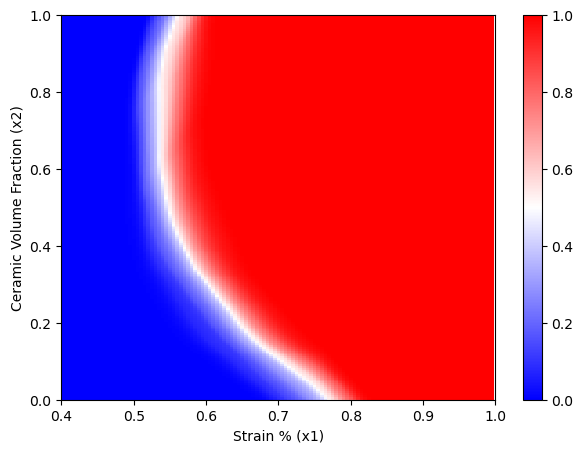

In [20]:
h = .005  # step size in the mesh
xx, yy = np.meshgrid(np.arange(0.4, 1, h), np.arange(0, 1, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(7, 5))
plt.xlim(0.4, 1)
plt.ylim(0, 1)
plt.pcolormesh(xx, yy, Z, cmap='bwr')
plt.colorbar()
# plt.title()
plt.xlabel("Strain % (x1)")
plt.ylabel("Ceramic Volume Fraction (x2)")
plt.show()

Dataset Contour
=

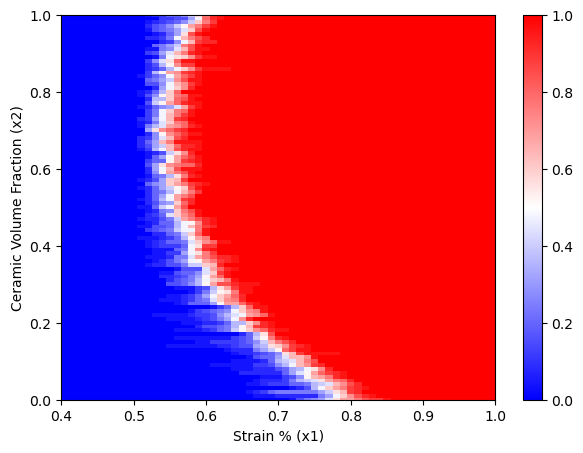

In [22]:
x_values = sorted(list(set(df['X'].values)))
y_values = sorted(list(set(df['Y'].values)))
xx, yy = np.meshgrid(x_values, y_values)
Z_ = []
for i in range(len(xx)):
    for j in range(len(xx[0])):
        Z_.append(df[(df['X']==xx[i][j]) & (df['Y']==yy[i][j]) & (df['labels']==1)].shape[0]/df[(df['X']==xx[i][j]) & (df['Y']==yy[i][j])].shape[0])
Z = np.array(Z_)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(7, 5))
plt.xlim(0.4, 1)
plt.ylim(0, 1)
plt.pcolormesh(xx, yy, Z, cmap='bwr')
plt.colorbar()
# plt.title()
plt.xlabel("Strain % (x1)")
plt.ylabel("Ceramic Volume Fraction (x2)")
plt.show()